In [1]:
# Import necessary packages

%matplotlib inline

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn import linear_model
from sklearn.svm import SVR
from sklearn.ensemble import RandomForestRegressor
from sklearn import neighbors
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import KFold
from scipy.stats import linregress
from scipy.stats import norm
from operator import itemgetter
from sklearn.model_selection import cross_val_score

In [2]:
# Import the datasets

dfCollege = pd.read_csv('final-college-data.csv')
dfNBA = pd.read_csv('final-nba-data.csv')
dfCombined = pd.read_csv('final-data-combined.csv')

dfDraftClass = pd.read_csv('final-draft-class-data.csv')

In [3]:
# Preview the combined dataset

dfCombined.head()

,Player,Pk,Age at Draft,Height (in),MPG-NBA,AST-NBA,TOV-NBA,AST/TOV-NBA,AST%-NBA,TOV%-NBA,MPG-Col,AST-Col,TOV-Col,AST/TOV-Col,AST%-Col,TOV%-Col,SOS-Col
0,Chris Paul,4,20.058,72,35.3,9.8,2.4,4.1,46.8,13.0,33.5,6.3,2.7,2.3,32.3,18.3,10.65
1,Dwyane Wade,5,21.165,76,34.5,5.5,3.2,1.7,30.6,13.7,30.7,2.3,3.1,0.7,27.9,15.0,6.03
2,James Harden,3,19.308,77,33.8,6.1,3.5,1.7,30.9,15.5,35.0,1.9,3.0,0.6,27.0,16.4,7.05
3,Stephen Curry,7,21.108,75,34.4,6.8,3.2,2.1,32.3,14.5,32.6,2.1,3.0,0.7,40.2,12.9,-1.31
4,Russell Westbrook,4,19.231,75,34.4,8.2,4.0,2.1,42.4,15.7,21.9,2.5,1.6,1.6,24.4,17.2,8.77


In [4]:
# Preview the draft class dataset

dfDraftClass.head()

,Player,Rd,Pk,Age at Draft,Height (in),MPG,AST,TOV,AST/TOV,AST%,TOV%,SOS
0,Trae Young,1,5,19.754,74,35.4,8.7,5.2,1.7,48.6,18.2,10.56
1,Collin Sexton,1,8,19.461,75,29.9,3.6,2.8,1.3,27.8,14.2,10.64
2,SGA,1,11,19.943,78,33.7,5.1,2.7,1.9,28.8,17.9,10.73
3,Jerome Robinson,1,13,21.326,79,34.6,3.3,2.9,1.1,20.6,15.2,7.65
4,Troy Brown,1,15,18.900,79,31.2,3.2,2.5,1.3,18.7,18.8,4.84


In [5]:
# Prepare draft class dataframe to be plugged into machine learning models by skipping columns that aren't parameters in the model

draftClassTest = dfDraftClass.iloc[:, [2, 3, 4, 6, 7, 9, 10, 11]]

draftClassNames = dfDraftClass.iloc[:, 0]

draftClassTest.head()

,Pk,Age at Draft,Height (in),AST,TOV,AST%,TOV%,SOS
0,5,19.754,74,8.7,5.2,48.6,18.2,10.56
1,8,19.461,75,3.6,2.8,27.8,14.2,10.64
2,11,19.943,78,5.1,2.7,28.8,17.9,10.73
3,13,21.326,79,3.3,2.9,20.6,15.2,7.65
4,15,18.900,79,3.2,2.5,18.7,18.8,4.84


# Correlation between college and NBA distribution stats

College and NBA AST: slope = 0.6035813168990206 , intercept = 0.972962398991676 , r_value = 0.49698714880264816 , p_value = 1.166530396630014e-09 , std_err = 0.092077508229597


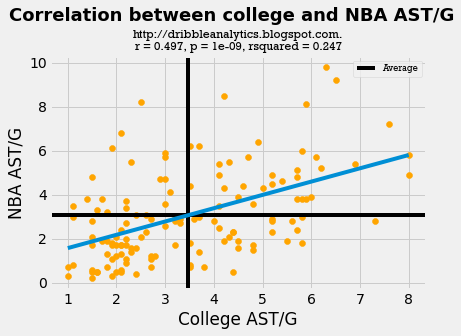

In [6]:
plt.style.use('fivethirtyeight')
 
ast, ax = plt.subplots()

ax.scatter(dfCollege['AST'], dfNBA['AST'], color = 'orange', label = "_nolegend_")
ax.axvline(x = np.mean(dfCollege['AST']), color = 'black')
ax.axhline(y = np.mean(dfNBA['AST']), label = "Average", color = 'black')
ast.suptitle("Correlation between college and NBA AST/G", weight = 'bold', size = 18, y = 1.05)
ax.set_xlabel("College AST/G")
ax.set_ylabel("NBA AST/G")
 
ax.plot(np.unique(dfCollege['AST']), np.poly1d(np.polyfit(dfCollege['AST'], dfNBA['AST'], 1))(np.unique(dfCollege['AST'])))

ax.legend(loc='best', prop={'size': 9, "family": "Rockwell"})
 
slope, intercept, r_value, p_value, std_err = linregress(dfCollege['AST'], dfNBA['AST'])
print("College and NBA AST: slope =", slope, ", intercept =", intercept, ", r_value =", r_value,
    ", p_value =", p_value, ", std_err =", std_err)
rsqaured = r_value ** 2
rpString = "r = " + str(round(r_value, 3)) + ", p = " + str(round(p_value, 9)) + ", rsquared = " + str(round(rsqaured, 3))

ax.set_title("http://dribbleanalytics.blogspot.com.\n%s"%rpString, size = 12, fontname = 'Rockwell')
ast.savefig('ast-correl.png', dpi = 400, bbox_inches = 'tight')

College and NBA AST: slope = 0.41972363835434284 , intercept = 0.548617947376911 , r_value = 0.3536523559163148 , p_value = 2.9696382903784155e-05 , std_err = 0.09699243943014103


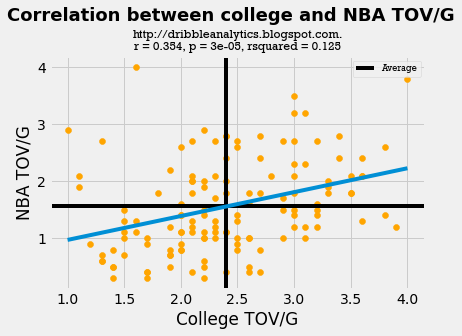

In [7]:
plt.style.use('fivethirtyeight')
 
tov, ax = plt.subplots()

ax.scatter(dfCollege['TOV'], dfNBA['TOV'], color = 'orange', label = "_nolegend_")
ax.axvline(x = np.mean(dfCollege['TOV']), color = 'black')
ax.axhline(y = np.mean(dfNBA['TOV']), label = "Average", color = 'black')
tov.suptitle("Correlation between college and NBA TOV/G", weight = 'bold', size = 18, y = 1.05)
ax.set_xlabel("College TOV/G")
ax.set_ylabel("NBA TOV/G")
 
ax.plot(np.unique(dfCollege['TOV']), np.poly1d(np.polyfit(dfCollege['TOV'], dfNBA['TOV'], 1))(np.unique(dfCollege['TOV'])))

ax.legend(loc='best', prop={'size': 9, "family": "Rockwell"})
 
slope, intercept, r_value, p_value, std_err = linregress(dfCollege['TOV'], dfNBA['TOV'])
print("College and NBA AST: slope =", slope, ", intercept =", intercept, ", r_value =", r_value,
    ", p_value =", p_value, ", std_err =", std_err)
rsqaured = r_value ** 2
rpString = "r = " + str(round(r_value, 3)) + ", p = " + str(round(p_value, 5)) + ", rsquared = " + str(round(rsqaured, 3))

ax.set_title("http://dribbleanalytics.blogspot.com.\n%s"%rpString, size = 12, fontname = 'Rockwell')
tov.savefig('tov-correl.png', dpi = 400, bbox_inches = 'tight')

College and NBA AST: slope = 0.6295112874002258 , intercept = 0.9607399945434315 , r_value = 0.571688145767527 , p_value = 6.623891571264966e-13 , std_err = 0.07893541975216779


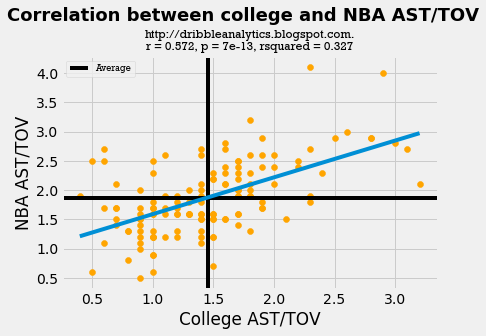

In [8]:
plt.style.use('fivethirtyeight')
 
asttov, ax = plt.subplots()

ax.scatter(dfCollege['AST/TOV'], dfNBA['AST/TOV'], color = 'orange', label = "_nolegend_")
ax.axvline(x = np.mean(dfCollege['AST/TOV']), color = 'black')
ax.axhline(y = np.mean(dfNBA['AST/TOV']), label = "Average", color = 'black')
asttov.suptitle("Correlation between college and NBA AST/TOV", weight = 'bold', size = 18, y = 1.05)
ax.set_xlabel("College AST/TOV")
ax.set_ylabel("NBA AST/TOV")
 
ax.plot(np.unique(dfCollege['AST/TOV']), np.poly1d(np.polyfit(dfCollege['AST/TOV'], dfNBA['AST/TOV'], 1))(np.unique(dfCollege['AST/TOV'])))

ax.legend(loc='best', prop={'size': 9, "family": "Rockwell"})
 
slope, intercept, r_value, p_value, std_err = linregress(dfCollege['AST/TOV'], dfNBA['AST/TOV'])
print("College and NBA AST: slope =", slope, ", intercept =", intercept, ", r_value =", r_value,
    ", p_value =", p_value, ", std_err =", std_err)
rsqaured = r_value ** 2
rpString = "r = " + str(round(r_value, 3)) + ", p = " + str(round(p_value, 13)) + ", rsquared = " + str(round(rsqaured, 3))

ax.set_title("http://dribbleanalytics.blogspot.com.\n%s"%rpString, size = 12, fontname = 'Rockwell')
asttov.savefig('asttov-correl.png', dpi = 400, bbox_inches = 'tight')

# Histogram of assists and turnovers

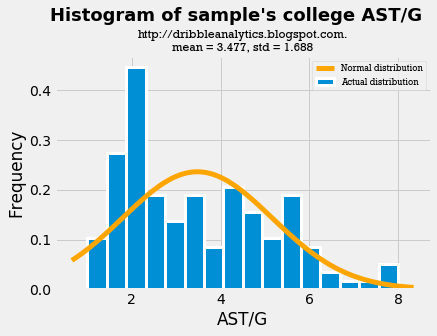

In [9]:
plt.style.use('fivethirtyeight')
astHistCollege, ax = plt.subplots()

ax.hist(dfCollege['AST'], bins = 16, edgecolor = 'white', linewidth = 3, normed = True, label = "Actual distribution")
astHistCollege.suptitle("Histogram of sample's college AST/G", weight = 'bold', size = 18, y = 1.05)
ax.set_xlabel("AST/G")
ax.set_ylabel("Frequency")

overall_mean = dfCollege['AST'].mean()
overall_std = dfCollege['AST'].std()

xmin, xmax = plt.xlim()
x = np.linspace(xmin, xmax, 100)
p = norm.pdf(x, overall_mean, overall_std)
ax.plot(x, p, 'k', linewidth=5, color='orange', label = "Normal distribution")

ax.legend(loc='best', prop={'size': 9, "family": "Rockwell"})
ax.set_title("http://dribbleanalytics.blogspot.com.\nmean = %.3f, std = %.3f"%(overall_mean, overall_std), size = 12, fontname = 'Rockwell')

astHistCollege.savefig('ast-hist-college.png', dpi = 400, bbox_inches = 'tight')

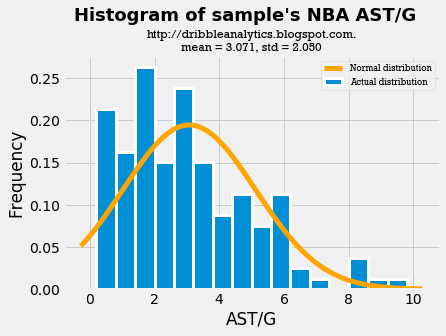

In [10]:
plt.style.use('fivethirtyeight')
astHistNBA, ax = plt.subplots()

ax.hist(dfNBA['AST'], bins = 16, edgecolor = 'white', linewidth = 3, normed = True, label = "Actual distribution")
astHistNBA.suptitle("Histogram of sample's NBA AST/G", weight = 'bold', size = 18, y = 1.05)
ax.set_xlabel("AST/G")
ax.set_ylabel("Frequency")

overall_mean = dfNBA['AST'].mean()
overall_std = dfNBA['AST'].std()

xmin, xmax = plt.xlim()
x = np.linspace(xmin, xmax, 100)
p = norm.pdf(x, overall_mean, overall_std)
ax.plot(x, p, 'k', linewidth=5, color='orange', label = "Normal distribution")

ax.legend(loc='best', prop={'size': 9, "family": "Rockwell"})
ax.set_title("http://dribbleanalytics.blogspot.com.\nmean = %.3f, std = %.3f"%(overall_mean, overall_std), size = 12, fontname = 'Rockwell')

astHistNBA.savefig('ast-hist-nba.png', dpi = 400, bbox_inches = 'tight')

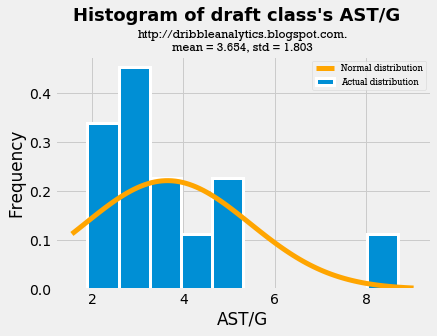

In [11]:
plt.style.use('fivethirtyeight')
astHistDraftClass, ax = plt.subplots()

ax.hist(dfDraftClass['AST'], bins = 10, edgecolor = 'white', linewidth = 3, normed = True, label = "Actual distribution")
astHistDraftClass.suptitle("Histogram of draft class's AST/G", weight = 'bold', size = 18, y = 1.05)
ax.set_xlabel("AST/G")
ax.set_ylabel("Frequency")

overall_mean = dfDraftClass['AST'].mean()
overall_std = dfDraftClass['AST'].std()

xmin, xmax = plt.xlim()
x = np.linspace(xmin, xmax, 100)
p = norm.pdf(x, overall_mean, overall_std)
ax.plot(x, p, 'k', linewidth=5, color='orange', label = "Normal distribution")

ax.legend(loc='best', prop={'size': 9, "family": "Rockwell"})
ax.set_title("http://dribbleanalytics.blogspot.com.\nmean = %.3f, std = %.3f"%(overall_mean, overall_std), size = 12, fontname = 'Rockwell')

astHistDraftClass.savefig('ast-hist-draft-class.png', dpi = 400, bbox_inches = 'tight')

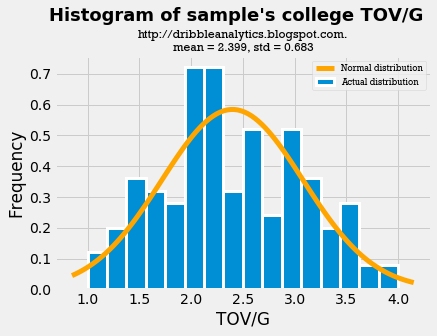

In [12]:
plt.style.use('fivethirtyeight')
tovHistCollege, ax = plt.subplots()

ax.hist(dfCollege['TOV'], bins = 16, edgecolor = 'white', linewidth = 3, normed = True, label = "Actual distribution")
tovHistCollege.suptitle("Histogram of sample's college TOV/G", weight = 'bold', size = 18, y = 1.05)
ax.set_xlabel("TOV/G")
ax.set_ylabel("Frequency")

overall_mean = dfCollege['TOV'].mean()
overall_std = dfCollege['TOV'].std()

xmin, xmax = plt.xlim()
x = np.linspace(xmin, xmax, 100)
p = norm.pdf(x, overall_mean, overall_std)
ax.plot(x, p, 'k', linewidth=5, color='orange', label = "Normal distribution")

ax.legend(loc='best', prop={'size': 9, "family": "Rockwell"})
ax.set_title("http://dribbleanalytics.blogspot.com.\nmean = %.3f, std = %.3f"%(overall_mean, overall_std), size = 12, fontname = 'Rockwell')

tovHistCollege.savefig('tov-hist-college.png', dpi = 400, bbox_inches = 'tight')

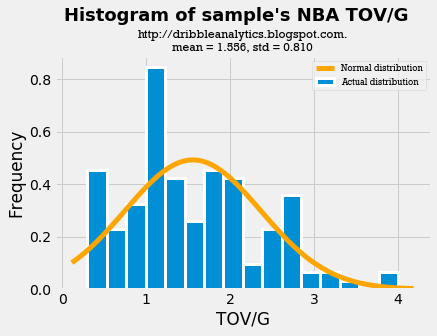

In [13]:
plt.style.use('fivethirtyeight')
tovHistNBA, ax = plt.subplots()

ax.hist(dfNBA['TOV'], bins = 16, edgecolor = 'white', linewidth = 3, normed = True, label = "Actual distribution")
tovHistNBA.suptitle("Histogram of sample's NBA TOV/G", weight = 'bold', size = 18, y = 1.05)
ax.set_xlabel("TOV/G")
ax.set_ylabel("Frequency")

overall_mean = dfNBA['TOV'].mean()
overall_std = dfNBA['TOV'].std()

xmin, xmax = plt.xlim()
x = np.linspace(xmin, xmax, 100)
p = norm.pdf(x, overall_mean, overall_std)
ax.plot(x, p, 'k', linewidth=5, color='orange', label = "Normal distribution")

ax.legend(loc='best', prop={'size': 9, "family": "Rockwell"})
ax.set_title("http://dribbleanalytics.blogspot.com.\nmean = %.3f, std = %.3f"%(overall_mean, overall_std), size = 12, fontname = 'Rockwell')

tovHistNBA.savefig('tov-hist-nba.png', dpi = 400, bbox_inches = 'tight')

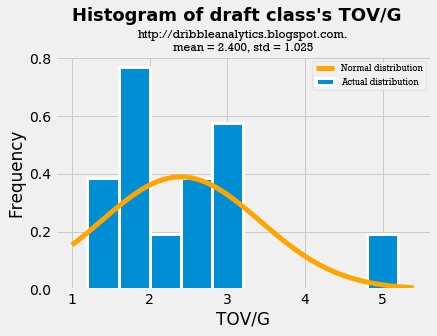

In [14]:
plt.style.use('fivethirtyeight')
tovHistDraftClass, ax = plt.subplots()

ax.hist(dfDraftClass['TOV'], bins = 10, edgecolor = 'white', linewidth = 3, normed = True, label = "Actual distribution")
tovHistDraftClass.suptitle("Histogram of draft class's TOV/G", weight = 'bold', size = 18, y = 1.05)
ax.set_xlabel("TOV/G")
ax.set_ylabel("Frequency")

overall_mean = dfDraftClass['TOV'].mean()
overall_std = dfDraftClass['TOV'].std()

xmin, xmax = plt.xlim()
x = np.linspace(xmin, xmax, 100)
p = norm.pdf(x, overall_mean, overall_std)
ax.plot(x, p, 'k', linewidth=5, color='orange', label = "Normal distribution")

ax.legend(loc='best', prop={'size': 9, "family": "Rockwell"})
ax.set_title("http://dribbleanalytics.blogspot.com.\nmean = %.3f, std = %.3f"%(overall_mean, overall_std), size = 12, fontname = 'Rockwell')

tovHistDraftClass.savefig('tov-hist-draft-class.png', dpi = 400, bbox_inches = 'tight')

# Creating assists model

In [15]:
train, test = train_test_split(dfCombined, test_size = 0.2, random_state = 65)

xtrain = train[['Pk', 'Age at Draft', 'Height (in)', 'AST-Col', 'TOV-Col', 'AST%-Col', 'TOV%-Col', 'SOS-Col']]
ytrain = train[['AST-NBA']]
 
xtest = test[['Pk', 'Age at Draft', 'Height (in)', 'AST-Col', 'TOV-Col', 'AST%-Col', 'TOV%-Col', 'SOS-Col']]
ytest = test[['AST-NBA']]

kf = KFold(n_splits = 4, random_state = 0)

In [16]:
linReg = linear_model.LinearRegression(fit_intercept = True)
linReg.fit(xtrain, ytrain)

y_predLin = linReg.predict(xtest)

print("Mean squared error: %.3f" % mean_squared_error(ytest, y_predLin))
print('R2 score: %.3f' % r2_score(ytest, y_predLin))

cvScoreLin = cross_val_score(linReg, xtest, ytest, cv = kf, scoring = 'explained_variance')
print("Accuracy (cross validation score): %0.2f (+/- %0.2f)" % (cvScoreLin.mean(), cvScoreLin.std() * 2))

Mean squared error: 1.151
R2 score: 0.692
Accuracy (cross validation score): 0.43 (+/- 0.50)


In [17]:
svr_rbf = SVR(kernel='rbf', gamma=1e-5, C=1000, epsilon=1)
svr_rbf.fit(xtrain, ytrain.values.ravel())

y_rbf = svr_rbf.predict(xtest)

print("Mean squared error: %.3f" % mean_squared_error(ytest, y_rbf))
print('R2 score: %.3f' % r2_score(ytest, y_rbf))

cvScoreSVM = cross_val_score(svr_rbf, xtest, ytest.values.ravel(), cv = kf, scoring = 'explained_variance')
print("Accuracy (cross validation score): %0.2f (+/- %0.2f)" % (cvScoreSVM.mean(), cvScoreSVM.std() * 2))

Mean squared error: 1.403
R2 score: 0.625
Accuracy (cross validation score): 0.61 (+/- 0.09)


In [18]:
rf = RandomForestRegressor(n_estimators = 50, random_state = 7)
rf.fit(xtrain, ytrain.values.ravel())

y_rf = rf.predict(xtest)

print("Mean squared error: %.3f" % mean_squared_error(ytest, y_rf))
print('R2 score: %.3f' % r2_score(ytest, y_rf))

cvScoreRF = cross_val_score(rf, xtest, ytest.values.ravel(), cv = kf, scoring = 'explained_variance')
print("Accuracy (cross validation score): %0.2f (+/- %0.2f)" % (cvScoreRF.mean(), cvScoreRF.std() * 2))

Mean squared error: 2.029
R2 score: 0.458
Accuracy (cross validation score): 0.43 (+/- 0.62)


In [19]:
knn = neighbors.KNeighborsRegressor(n_neighbors = 10)
knn.fit(xtrain, ytrain)

y_knn = knn.predict(xtest)

print("Mean squared error: %.3f" % mean_squared_error(ytest, y_knn))
print('R2 score: %.3f' % r2_score(ytest, y_knn))

cvScoreKNN = cross_val_score(knn, xtest, ytest, cv = kf, scoring = 'explained_variance')
print("Accuracy (cross validation score): %0.2f (+/- %0.2f)" % (cvScoreKNN.mean(), cvScoreKNN.std() * 2))

Mean squared error: 2.173
R2 score: 0.419
Accuracy (cross validation score): 0.50 (+/- 0.28)


# R2 and MSE graphs for assists

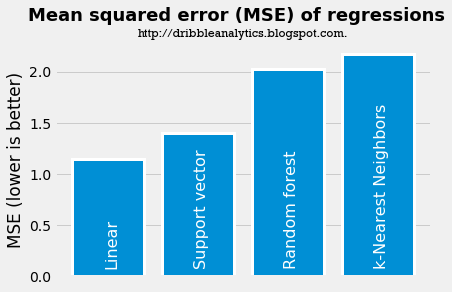

In [20]:
plt.style.use('fivethirtyeight')
mseAST, ax = plt.subplots()

mseScores = [mean_squared_error(ytest, y_predLin), mean_squared_error(ytest, y_rbf), mean_squared_error(ytest, y_rf), mean_squared_error(ytest, y_knn)]
x_pos = np.arange(len(mseScores))

ax.bar(x_pos, mseScores, edgecolor = 'white', linewidth = 3)

mseNames = ["Linear", "Support vector", "Random forest", "k-Nearest Neighbors"]

labels = [i for i in mseNames]

rects = ax.patches
for rect, label in zip(rects, labels):
    height = .075
    ax.text(rect.get_x() + rect.get_width() / 1.8, height, label,
            ha='center', va='bottom', rotation = 'vertical', color = 'white', size = 16)

mseAST.suptitle("Mean squared error (MSE) of regressions", weight = 'bold', size = 18, y = 1.005)
ax.set_title("http://dribbleanalytics.blogspot.com.", size = 12, fontname = 'Rockwell')
ax.xaxis.set_visible(False)
ax.set_ylabel("MSE (lower is better)")

mseAST.savefig('mse-ast.png', dpi = 400, bbox_inches = 'tight')

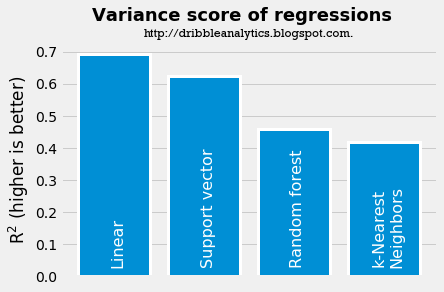

In [21]:
r2ast, ax = plt.subplots()

r2scores = [r2_score(ytest, y_predLin), r2_score(ytest, y_rbf), r2_score(ytest, y_rf), r2_score(ytest, y_knn)]
x_pos = np.arange(len(r2scores))

ax.bar(x_pos, r2scores, edgecolor = 'white', linewidth = 3)

r2names = ["Linear", "Support vector", "Random forest", "k-Nearest\nNeighbors"]

labels = [i for i in r2names]

rects = ax.patches
for rect, label in zip(rects, labels):
    height = .025
    ax.text(rect.get_x() + rect.get_width() / 1.8, height, label,
            ha='center', va='bottom', rotation = 'vertical', color = 'white', size = 16)

r2ast.suptitle("Variance score of regressions", weight = 'bold', size = 18, y = 1.005)
ax.set_title("http://dribbleanalytics.blogspot.com.", size = 12, fontname = 'Rockwell')
ax.xaxis.set_visible(False)
ax.set_ylabel(r"R$^{\rm 2}$ (higher is better)")

r2ast.savefig('r2-ast.png', dpi = 400, bbox_inches = 'tight')

# Standardized residuals test for assists

[25.70788098]
[5.07029397]
0.2115434852480561 0.004530205951760168


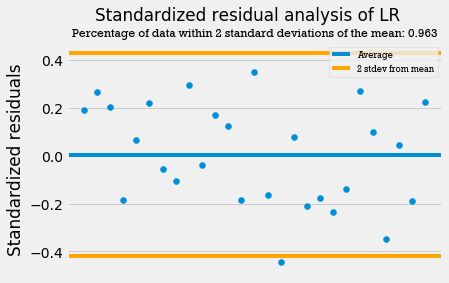

In [22]:
plt.style.use('fivethirtyeight')

linResid = ytest.subtract(y_predLin)

linList = []
sumResid = 0

for i in linResid.values:
    linList.append(i)

for i in linList:
    if i < 0:
        sumResid += (i * -1)
    elif i > 0:
        sumResid+= i
        
print(sumResid)
residSqrt = sumResid ** (1/2)
print(residSqrt)

linResidArray = []
for i in linList:
    linResidArray.append(i / residSqrt)

linResidList = []
for i in linResidArray:
    linResidList.append(i[0])

linResidAst, ax = plt.subplots()

x = np.arange(len(linResidList))

ax.scatter(x, linResidList)

ax.xaxis.set_visible(False)
ax.set_ylabel("Standardized residuals")

npList = np.array(linResidList)
std = np.std(npList)
mean = np.mean(npList)

print(std, mean)

outliers = 0

for i in linResidList:
    if i < mean - 2 * std:
        outliers += 1
    elif i > mean + 2 * std:
        outliers += 1
        
outlierPerc = outliers / 27
distPerc = 1 - outlierPerc

ax.axhline(y = mean, label = "Average")
ax.axhline(y = mean - 2 * std, color = 'orange')
ax.axhline(y = mean + 2 * std, label = "2 stdev from mean", color = 'orange')
ax.legend(loc='best', prop={'size': 9, "family": "Rockwell"})
ax.set_title("Percentage of data within 2 standard deviations of the mean: %.3f" % distPerc, fontname = 'Rockwell', size = 12)
linResidAst.suptitle("Standardized residual analysis of LR", y = 1.005)
linResidAst.savefig('lin-resid-ast.png', dpi = 400, bbox_inches = 'tight')

26.66807479686121
5.164114134763213
0.2293994280483438 -0.0017924630806465936


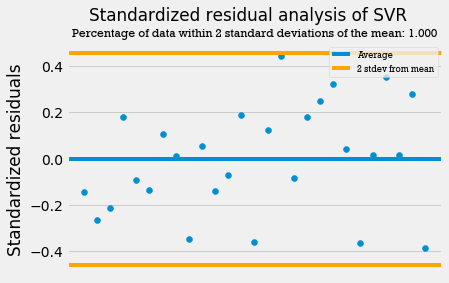

In [23]:
svrResid = y_rbf - ytest['AST-NBA']

svrList = []
sumResid = 0

for i in svrResid.values:
    svrList.append(i)

for i in svrList:
    if i < 0:
        sumResid += (i * -1)
    elif i > 0:
        sumResid+= i
        
print(sumResid)
residSqrt = sumResid ** (1/2)
print(residSqrt)

svrResidArray = []
for i in svrList:
    svrResidArray.append(i / residSqrt)

svrResidList = []
for i in svrResidArray:
    svrResidList.append(i)    

svrResidAst, ax = plt.subplots()

x = np.arange(len(svrResidList))

ax.scatter(x, svrResidList)

ax.xaxis.set_visible(False)
ax.set_ylabel("Standardized residuals")

npList = np.array(svrResidList)
std = np.std(npList)
mean = np.mean(npList)

print(std, mean)

outliers = 0

for i in svrResidList:
    if i < mean - 2 * std:
        outliers += 1
    elif i > mean + 2 * std:
        outliers += 1
        
outlierPerc = outliers / 27
distPerc = 1 - outlierPerc

ax.axhline(y = mean, label = "Average")
ax.axhline(y = mean - 2 * std, color = 'orange')
ax.axhline(y = mean + 2 * std, label = "2 stdev from mean", color = 'orange')
ax.legend(loc='best', prop={'size': 9, "family": "Rockwell"})
ax.set_title("Percentage of data within 2 standard deviations of the mean: %.3f" % distPerc, fontname = 'Rockwell', size = 12)
svrResidAst.suptitle("Standardized residual analysis of SVR", y = 1.005)
svrResidAst.savefig('svr-resid-ast.png', dpi = 400, bbox_inches = 'tight')

32.446000000000005
5.696139043246751
0.24714938198784842 0.03814149507407804


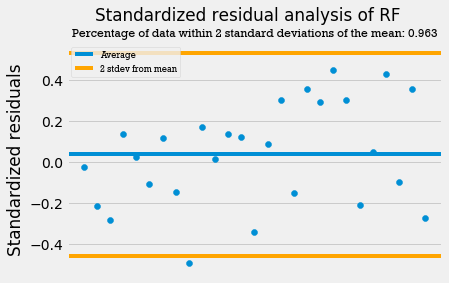

In [24]:
rfResid = y_rf - ytest['AST-NBA']

rfList = []
sumResid = 0

for i in rfResid.values:
    rfList.append(i)

for i in rfList:
    if i < 0:
        sumResid += (i * -1)
    elif i > 0:
        sumResid+= i
        
print(sumResid)
residSqrt = sumResid ** (1/2)
print(residSqrt)

rfResidArray = []
for i in rfList:
    rfResidArray.append(i / residSqrt)

rfResidList = []
for i in rfResidArray:
    rfResidList.append(i)    
    
rfResidAst, ax = plt.subplots()

x = np.arange(len(rfResidList))

ax.scatter(x, rfResidList)

ax.xaxis.set_visible(False)
ax.set_ylabel("Standardized residuals")

npList = np.array(rfResidList)
std = np.std(npList)
mean = np.mean(npList)

print(std, mean)

outliers = 0

for i in rfResidList:
    if i < mean - 2 * std:
        outliers += 1
    elif i > mean + 2 * std:
        outliers += 1
        
outlierPerc = outliers / 27
distPerc = 1 - outlierPerc

ax.axhline(y = mean, label = "Average")
ax.axhline(y = mean - 2 * std, color = 'orange')
ax.axhline(y = mean + 2 * std, label = "2 stdev from mean", color = 'orange')
ax.legend(loc='best', prop={'size': 9, "family": "Rockwell"})
ax.set_title("Percentage of data within 2 standard deviations of the mean: %.3f" % distPerc, fontname = 'Rockwell', size = 12)
rfResidAst.suptitle("Standardized residual analysis of RF", y = 1.005)
rfResidAst.savefig('rf-resid-ast.png', dpi = 400, bbox_inches = 'tight')

[32.2]
[5.67450438]
0.2566252703987938 -0.040336366564208255


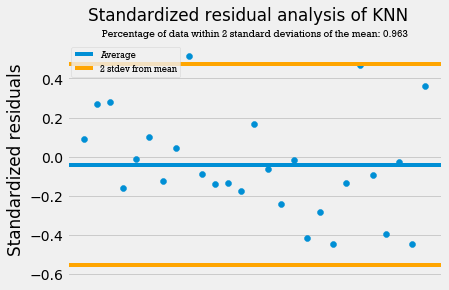

In [25]:
plt.style.use('fivethirtyeight')

knnResid = ytest.subtract(y_knn)

knnList = []
sumResid = 0

for i in knnResid.values:
    knnList.append(i)

for i in knnList:
    if i < 0:
        sumResid += (i * -1)
    elif i > 0:
        sumResid+= i
        
print(sumResid)
residSqrt = sumResid ** (1/2)
print(residSqrt)

knnResidArray = []
for i in knnList:
    knnResidArray.append(i / residSqrt)

knnResidList = []
for i in knnResidArray:
    knnResidList.append(i[0])    
    
knnResidAst, ax = plt.subplots()

x = np.arange(len(knnResidList))

ax.scatter(x, knnResidList)

ax.xaxis.set_visible(False)
ax.set_ylabel("Standardized residuals")

npList = np.array(knnResidList)
std = np.std(npList)
mean = np.mean(npList)

print(std, mean)

outliers = 0

for i in knnResidList:
    if i < mean - 2 * std:
        outliers += 1
    elif i > mean + 2 * std:
        outliers += 1
        
outlierPerc = outliers / 27
distPerc = 1 - outlierPerc

ax.axhline(y = mean, label = "Average")
ax.axhline(y = mean - 2 * std, color = 'orange')
ax.axhline(y = mean + 2 * std, label = "2 stdev from mean", color = 'orange')
ax.legend(loc='best', prop={'size': 9, "family": "Rockwell"})
ax.set_title("Percentage of data within 2 standard deviations of the mean: %.3f" % distPerc, fontname = 'Rockwell', size = 10)
knnResidAst.suptitle("Standardized residual analysis of KNN", y = 1.005)
knnResidAst.savefig('knn-resid-ast.png', dpi = 400, bbox_inches = 'tight')

# Durbin-Watson test for assists

In [26]:
from statsmodels.stats import stattools as stools

print(stools.durbin_watson(linResidList))
print(stools.durbin_watson(svrResidList))
print(stools.durbin_watson(rfResidList))
print(stools.durbin_watson(knnResidList))

2.074859177918497
1.9962931158659332
1.94323598723722
1.7585844261652424


# Jarque-Bera test for assists

In [27]:
print(stools.jarque_bera(linResidList))
print(stools.jarque_bera(svrResidList))
print(stools.jarque_bera(rfResidList))
print(stools.jarque_bera(knnResidList))

(1.3341411087805568, 0.5132097980311445, -0.19029513782031274, 1.9796793396717225)
(0.9077770561979287, 0.6351535310714289, -0.01190657102809036, 2.1020323652224344)
(0.8887000111530057, 0.6412409436393218, -0.15202400342210898, 2.1648291342465322)
(0.896896160111823, 0.6386184677140736, 0.40158034138984466, 2.609905205305976)


# Predictions for assists

In [28]:
linear_ast = linReg.predict(draftClassTest)

for i, j in zip(linear_ast, draftClassNames):
    print(i, j)

[5.51956364] Trae Young
[3.96534464] Collin Sexton
[3.54076017] SGA
[2.0165024] Jerome Robinson
[2.80717721] Troy Brown
[2.16674029] Donte DiVincenzo
[1.93444949] Lonnie Walker
[2.10542376] Kevin Huerter
[1.65472504] Josh Okogie
[1.56666711] Grayson Allen
[1.42952549] Chandler Hutchison
[3.03929775] Aaron Holiday
[2.20410161] Landry Shamet


In [29]:
svr_ast = svr_rbf.predict(draftClassTest)

for i, j in zip(svr_ast, draftClassNames):
    print(i, j)

6.133586980402782 Trae Young
4.077642196681239 Collin Sexton
3.5841926452540633 SGA
2.50731044836283 Jerome Robinson
2.5607282628957933 Troy Brown
2.018857905845465 Donte DiVincenzo
1.942935396334434 Lonnie Walker
2.031108807911494 Kevin Huerter
1.7760750186128291 Josh Okogie
1.860715840527405 Grayson Allen
1.647614614775506 Chandler Hutchison
2.7511191657356733 Aaron Holiday
2.2343235465491205 Landry Shamet


In [30]:
rf_ast = rf.predict(draftClassTest)

for i, j in zip(rf_ast, draftClassNames):
    print(i, j)

5.694 Trae Young
4.530000000000002 Collin Sexton
3.2880000000000007 SGA
2.468000000000001 Jerome Robinson
2.8900000000000006 Troy Brown
1.7160000000000002 Donte DiVincenzo
1.5880000000000003 Lonnie Walker
2.6180000000000008 Kevin Huerter
1.4880000000000002 Josh Okogie
2.498 Grayson Allen
1.4420000000000002 Chandler Hutchison
3.8020000000000005 Aaron Holiday
2.5879999999999996 Landry Shamet


In [31]:
knn_ast = knn.predict(draftClassTest)

for i, j in zip(knn_ast, draftClassNames):
    print(i, j)

[6.08] Trae Young
[4.57] Collin Sexton
[2.97] SGA
[2.05] Jerome Robinson
[2.52] Troy Brown
[2.01] Donte DiVincenzo
[1.63] Lonnie Walker
[2.32] Kevin Huerter
[1.62] Josh Okogie
[2.14] Grayson Allen
[2.06] Chandler Hutchison
[4.12] Aaron Holiday
[2.58] Landry Shamet


[['Trae Young', 5.519563635891794], ['Collin Sexton', 3.965344638382703], ['SGA', 3.5407601737787964], ['Aaron Holiday', 3.0392977510472683], ['Troy Brown', 2.8071772141182336], ['Landry Shamet', 2.2041016132631697], ['Donte DiVincenzo', 2.1667402927367903], ['Kevin Huerter', 2.1054237631092754], ['Jerome Robinson', 2.016502401689131], ['Lonnie Walker', 1.9344494909667524], ['Josh Okogie', 1.6547250428654472], ['Grayson Allen', 1.5666671102028644], ['Chandler Hutchison', 1.4295254850513857]]


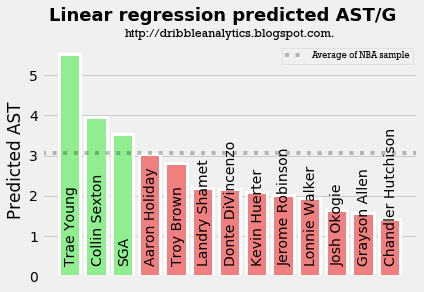

In [32]:
avgAst = 3.071429

plt.style.use('fivethirtyeight')
linRegAst, ax = plt.subplots()

linearPlot = []

for i in linear_ast:
    linearPlot.append(float(i))
    
combinedLinear = [[i, j] for i, j in zip(draftClassNames, linearPlot)]

sortedLinear = sorted(combinedLinear, key = itemgetter(1), reverse = True)
print(sortedLinear)

sortedLinearData = [row[1] for row in sortedLinear]
x_pos = np.arange(len(sortedLinearData))

colorList = []

for i in sortedLinearData:
    if i < avgAst:
        colorList.append('lightcoral')
    elif i > avgAst:
        colorList.append('lightgreen')

ax.bar(x_pos, sortedLinearData, color = colorList, edgecolor = 'white', linewidth = 3)

labels = [row[0] for row in sortedLinear]

rects = ax.patches
for rect, label in zip(rects, labels):
    height = .25
    ax.text(rect.get_x() + rect.get_width() / 1.75, height, label,
    ha='center', va='bottom', rotation = 'vertical', color = 'black')
    
linRegAst.suptitle("Linear regression predicted AST/G", weight = 'bold', size = 18, y = 1.005)
ax.set_title("http://dribbleanalytics.blogspot.com.", size = 12, fontname = 'Rockwell')
ax.xaxis.set_visible(False)
ax.axhline(y = avgAst, color = 'black', label = "Average of NBA sample", linestyle = 'dotted', alpha = .25)
ax.set_ylabel("Predicted AST")
ax.legend(loc='best', prop={'size': 9, "family": "Rockwell"})

linRegAst.savefig('lin-reg-ast.png', dpi = 400, bbox_inches = 'tight')

[['Trae Young', 6.133586980402782], ['Collin Sexton', 4.077642196681239], ['SGA', 3.5841926452540633], ['Aaron Holiday', 2.7511191657356733], ['Troy Brown', 2.5607282628957933], ['Jerome Robinson', 2.50731044836283], ['Landry Shamet', 2.2343235465491205], ['Kevin Huerter', 2.031108807911494], ['Donte DiVincenzo', 2.018857905845465], ['Lonnie Walker', 1.942935396334434], ['Grayson Allen', 1.860715840527405], ['Josh Okogie', 1.7760750186128291], ['Chandler Hutchison', 1.647614614775506]]


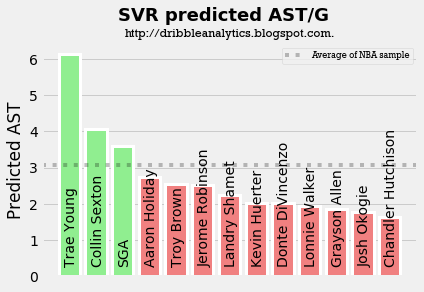

In [33]:
avgAst = 3.071429

plt.style.use('fivethirtyeight')
svrAst, ax = plt.subplots()

svrPlot = []

for i in svr_ast:
    svrPlot.append(float(i))
    
combinedSvr = [[i, j] for i, j in zip(draftClassNames, svrPlot)]

sortedSvr = sorted(combinedSvr, key = itemgetter(1), reverse = True)
print(sortedSvr)

sortedSvrData = [row[1] for row in sortedSvr]
x_pos = np.arange(len(sortedSvrData))

colorList = []

for i in sortedSvrData:
    if i < avgAst:
        colorList.append('lightcoral')
    elif i > avgAst:
        colorList.append('lightgreen')

ax.bar(x_pos, sortedSvrData, color = colorList, edgecolor = 'white', linewidth = 3)

labels = [row[0] for row in sortedSvr]

rects = ax.patches
for rect, label in zip(rects, labels):
    height = .25
    ax.text(rect.get_x() + rect.get_width() / 1.75, height, label,
    ha='center', va='bottom', rotation = 'vertical', color = 'black')
    
svrAst.suptitle("SVR predicted AST/G", weight = 'bold', size = 18, y = 1.005)
ax.set_title("http://dribbleanalytics.blogspot.com.", size = 12, fontname = 'Rockwell')
ax.xaxis.set_visible(False)
ax.axhline(y = avgAst, color = 'black', label = "Average of NBA sample", linestyle = 'dotted', alpha = .25)
ax.set_ylabel("Predicted AST")
ax.legend(loc='best', prop={'size': 9, "family": "Rockwell"})

svrAst.savefig('svr-ast.png', dpi = 400, bbox_inches = 'tight')

[['Trae Young', 5.694], ['Collin Sexton', 4.530000000000002], ['Aaron Holiday', 3.8020000000000005], ['SGA', 3.2880000000000007], ['Troy Brown', 2.8900000000000006], ['Kevin Huerter', 2.6180000000000008], ['Landry Shamet', 2.5879999999999996], ['Grayson Allen', 2.498], ['Jerome Robinson', 2.468000000000001], ['Donte DiVincenzo', 1.7160000000000002], ['Lonnie Walker', 1.5880000000000003], ['Josh Okogie', 1.4880000000000002], ['Chandler Hutchison', 1.4420000000000002]]


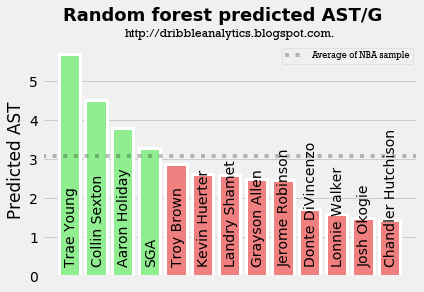

In [34]:
avgAst = 3.071429

plt.style.use('fivethirtyeight')
rfAst, ax = plt.subplots()

rfPlot = []

for i in rf_ast:
    rfPlot.append(float(i))
    
combinedRf = [[i, j] for i, j in zip(draftClassNames, rfPlot)]

sortedRf = sorted(combinedRf, key = itemgetter(1), reverse = True)
print(sortedRf)

sortedRfData = [row[1] for row in sortedRf]
x_pos = np.arange(len(sortedRfData))

colorList = []

for i in sortedRfData:
    if i < avgAst:
        colorList.append('lightcoral')
    elif i > avgAst:
        colorList.append('lightgreen')

ax.bar(x_pos, sortedRfData, color = colorList, edgecolor = 'white', linewidth = 3)

labels = [row[0] for row in sortedRf]

rects = ax.patches
for rect, label in zip(rects, labels):
    height = .25
    ax.text(rect.get_x() + rect.get_width() / 1.75, height, label,
    ha='center', va='bottom', rotation = 'vertical', color = 'black')
    
rfAst.suptitle("Random forest predicted AST/G", weight = 'bold', size = 18, y = 1.005)
ax.set_title("http://dribbleanalytics.blogspot.com.", size = 12, fontname = 'Rockwell')
ax.xaxis.set_visible(False)
ax.axhline(y = avgAst, color = 'black', label = "Average of NBA sample", linestyle = 'dotted', alpha = .25)
ax.set_ylabel("Predicted AST")
ax.legend(loc='best', prop={'size': 9, "family": "Rockwell"})

rfAst.savefig('rf-ast.png', dpi = 400, bbox_inches = 'tight')

[['Trae Young', 6.08], ['Collin Sexton', 4.569999999999999], ['Aaron Holiday', 4.12], ['SGA', 2.9699999999999998], ['Landry Shamet', 2.5799999999999996], ['Troy Brown', 2.5200000000000005], ['Kevin Huerter', 2.3200000000000003], ['Grayson Allen', 2.1399999999999997], ['Chandler Hutchison', 2.0599999999999996], ['Jerome Robinson', 2.05], ['Donte DiVincenzo', 2.01], ['Lonnie Walker', 1.6300000000000001], ['Josh Okogie', 1.6200000000000003]]


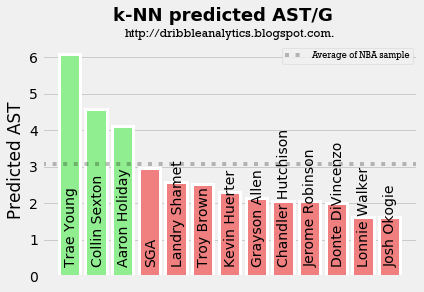

In [35]:
avgAst = 3.071429

plt.style.use('fivethirtyeight')
knnAst, ax = plt.subplots()

knnPlot = []

for i in knn_ast:
    knnPlot.append(float(i))
    
combinedKnn = [[i, j] for i, j in zip(draftClassNames, knnPlot)]

sortedKnn = sorted(combinedKnn, key = itemgetter(1), reverse = True)
print(sortedKnn)

sortedKnnData = [row[1] for row in sortedKnn]
x_pos = np.arange(len(sortedKnnData))

colorList = []

for i in sortedKnnData:
    if i < avgAst:
        colorList.append('lightcoral')
    elif i > avgAst:
        colorList.append('lightgreen')

ax.bar(x_pos, sortedKnnData, color = colorList, edgecolor = 'white', linewidth = 3)

labels = [row[0] for row in sortedKnn]

rects = ax.patches
for rect, label in zip(rects, labels):
    height = .25
    ax.text(rect.get_x() + rect.get_width() / 1.75, height, label,
    ha='center', va='bottom', rotation = 'vertical', color = 'black')
    
knnAst.suptitle("k-NN predicted AST/G", weight = 'bold', size = 18, y = 1.005)
ax.set_title("http://dribbleanalytics.blogspot.com.", size = 12, fontname = 'Rockwell')
ax.xaxis.set_visible(False)
ax.axhline(y = avgAst, color = 'black', label = "Average of NBA sample", linestyle = 'dotted', alpha = .25)
ax.set_ylabel("Predicted AST")
ax.legend(loc='best', prop={'size': 9, "family": "Rockwell"})

knnAst.savefig('knn-ast.png', dpi = 400, bbox_inches = 'tight')

[['Trae Young', 5.856787654073644], ['Collin Sexton', 4.285746708765986], ['Aaron Holiday', 3.4281042291957355], ['SGA', 3.3457382047582147], ['Troy Brown', 2.6944763692535068], ['Landry Shamet', 2.4016062899530723], ['Kevin Huerter', 2.2686331427551925], ['Jerome Robinson', 2.2604532125129904], ['Grayson Allen', 2.0163457376825673], ['Donte DiVincenzo', 1.9778995496455638], ['Lonnie Walker', 1.7738462218252966], ['Chandler Hutchison', 1.6447850249567229], ['Josh Okogie', 1.6347000153695692]]


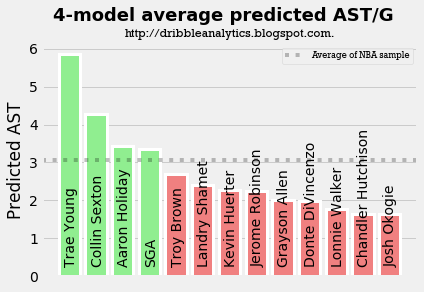

In [36]:
avgAst = 3.071429

avgAstGraph, ax = plt.subplots()

averagePred = []

for i, j, h, k in zip(linear_ast, svr_ast, rf_ast, knn_ast):
    averagePred.append(float((i + j + h + k) / 4))

combinedAvg = [[i, j] for i, j in zip(draftClassNames, averagePred)]

sortedAvg = sorted(combinedAvg, key = itemgetter(1), reverse = True)
print(sortedAvg)

sortedAvgData = [row[1] for row in sortedAvg]
x_pos = np.arange(len(sortedAvgData))

colorList = []

for i in sortedAvgData:
    if i < avgAst:
        colorList.append('lightcoral')
    elif i > avgAst:
        colorList.append('lightgreen')

ax.bar(x_pos, sortedAvgData, color = colorList, edgecolor = 'white', linewidth = 3)

labels = [row[0] for row in sortedAvg]

rects = ax.patches
for rect, label in zip(rects, labels):
    height = .25
    ax.text(rect.get_x() + rect.get_width() / 1.75, height, label,
    ha='center', va='bottom', rotation = 'vertical', color = 'black')

avgAstGraph.suptitle("4-model average predicted AST/G", weight = 'bold', size = 18, y = 1.005)
ax.set_title("http://dribbleanalytics.blogspot.com.", size = 12, fontname = 'Rockwell')
ax.xaxis.set_visible(False)
ax.axhline(y = avgAst, color = 'black', label = "Average of NBA sample", linestyle = 'dotted', alpha = .25)
ax.set_ylabel("Predicted AST")
ax.legend(loc='best', prop={'size': 9, "family": "Rockwell"})

avgAstGraph.savefig('avg-ast.png', dpi = 400, bbox_inches = 'tight')

# Creating turnover models

In [37]:
train, test = train_test_split(dfCombined, test_size = 0.2, random_state = 65)

xtrain = train[['Pk', 'Age at Draft', 'Height (in)', 'AST-Col', 'TOV-Col', 'AST%-Col', 'TOV%-Col', 'SOS-Col']]
ytrain = train[['TOV-NBA']]
 
xtest = test[['Pk', 'Age at Draft', 'Height (in)', 'AST-Col', 'TOV-Col', 'AST%-Col', 'TOV%-Col', 'SOS-Col']]
ytest = test[['TOV-NBA']]

kf = KFold(n_splits = 4, random_state = 0)

In [38]:
linReg = linear_model.LinearRegression(fit_intercept = True)
linReg.fit(xtrain, ytrain)

y_predLin = linReg.predict(xtest)

print("Mean squared error: %.3f" % mean_squared_error(ytest, y_predLin))
print('R2 score: %.3f' % r2_score(ytest, y_predLin))

cvScoreLin = cross_val_score(linReg, xtest, ytest, cv = kf, scoring = 'explained_variance')
print("Accuracy (cross validation score): %0.2f (+/- %0.2f)" % (cvScoreLin.mean(), cvScoreLin.std() * 2))

Mean squared error: 0.363
R2 score: 0.505
Accuracy (cross validation score): 0.12 (+/- 1.20)


In [39]:
svr_rbf = SVR(kernel='rbf', gamma=1e-5, C=1000, epsilon=1)
svr_rbf.fit(xtrain, ytrain.values.ravel())

y_rbf = svr_rbf.predict(xtest)

print("Mean squared error: %.3f" % mean_squared_error(ytest, y_rbf))
print('R2 score: %.3f' % r2_score(ytest, y_rbf))

cvScoreSVM = cross_val_score(svr_rbf, xtest, ytest.values.ravel(), cv = kf, scoring = 'explained_variance')
print("Accuracy (cross validation score): %0.2f (+/- %0.2f)" % (cvScoreSVM.mean(), cvScoreSVM.std() * 2))

Mean squared error: 0.386
R2 score: 0.474
Accuracy (cross validation score): 0.27 (+/- 0.24)


In [40]:
rf = RandomForestRegressor(n_estimators = 50, random_state = 7)
rf.fit(xtrain, ytrain.values.ravel())

y_rf = rf.predict(xtest)

print("Mean squared error: %.3f" % mean_squared_error(ytest, y_rf))
print('R2 score: %.3f' % r2_score(ytest, y_rf))

cvScoreRF = cross_val_score(rf, xtest, ytest.values.ravel(), cv = kf, scoring = 'explained_variance')
print("Accuracy (cross validation score): %0.2f (+/- %0.2f)" % (cvScoreRF.mean(), cvScoreRF.std() * 2))

Mean squared error: 0.537
R2 score: 0.268
Accuracy (cross validation score): 0.35 (+/- 0.72)


In [41]:
knn = neighbors.KNeighborsRegressor(n_neighbors = 10)
knn.fit(xtrain, ytrain)

y_knn = knn.predict(xtest)

print("Mean squared error: %.3f" % mean_squared_error(ytest, y_knn))
print('R2 score: %.3f' % r2_score(ytest, y_knn))

cvScoreKNN = cross_val_score(knn, xtest, ytest, cv = kf, scoring = 'explained_variance')
print("Accuracy (cross validation score): %0.2f (+/- %0.2f)" % (cvScoreKNN.mean(), cvScoreKNN.std() * 2))

Mean squared error: 0.471
R2 score: 0.358
Accuracy (cross validation score): 0.31 (+/- 0.17)


# R2 and MSE graphs for turnovers

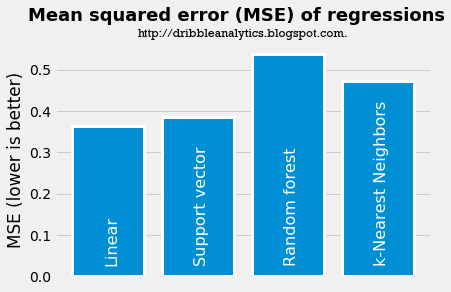

In [42]:
plt.style.use('fivethirtyeight')
mseTOV, ax = plt.subplots()

mseScores = [mean_squared_error(ytest, y_predLin), mean_squared_error(ytest, y_rbf), mean_squared_error(ytest, y_rf), mean_squared_error(ytest, y_knn)]
x_pos = np.arange(len(mseScores))

ax.bar(x_pos, mseScores, edgecolor = 'white', linewidth = 3)

mseNames = ["Linear", "Support vector", "Random forest", "k-Nearest Neighbors"]

labels = [i for i in mseNames]

rects = ax.patches
for rect, label in zip(rects, labels):
    height = .025
    ax.text(rect.get_x() + rect.get_width() / 1.8, height, label,
            ha='center', va='bottom', rotation = 'vertical', color = 'white', size = 16)

mseTOV.suptitle("Mean squared error (MSE) of regressions", weight = 'bold', size = 18, y = 1.005)
ax.set_title("http://dribbleanalytics.blogspot.com.", size = 12, fontname = 'Rockwell')
ax.xaxis.set_visible(False)
ax.set_ylabel("MSE (lower is better)")

mseTOV.savefig('mse-tov.png', dpi = 400, bbox_inches = 'tight')

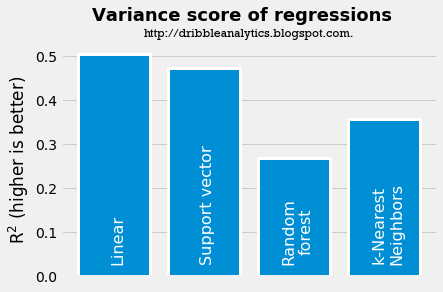

In [43]:
r2tov, ax = plt.subplots()

r2scores = [r2_score(ytest, y_predLin), r2_score(ytest, y_rbf), r2_score(ytest, y_rf), r2_score(ytest, y_knn)]
x_pos = np.arange(len(r2scores))

ax.bar(x_pos, r2scores, edgecolor = 'white', linewidth = 3)

r2names = ["Linear", "Support vector", "Random\nforest", "k-Nearest\nNeighbors"]

labels = [i for i in r2names]

rects = ax.patches
for rect, label in zip(rects, labels):
    height = .025
    ax.text(rect.get_x() + rect.get_width() / 1.8, height, label,
            ha='center', va='bottom', rotation = 'vertical', color = 'white', size = 16)

r2tov.suptitle("Variance score of regressions", weight = 'bold', size = 18, y = 1.005)
ax.set_title("http://dribbleanalytics.blogspot.com.", size = 12, fontname = 'Rockwell')
ax.xaxis.set_visible(False)
ax.set_ylabel(r"R$^{\rm 2}$ (higher is better)")

r2tov.savefig('r2-tov.png', dpi = 400, bbox_inches = 'tight')

# Standardized residuals test for turnovers

[13.05216646]
[3.61277822]
0.16583036909564733 0.018633224224504374


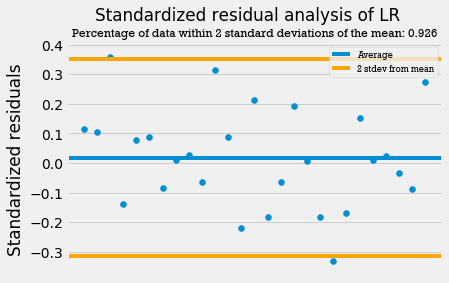

In [44]:
plt.style.use('fivethirtyeight')

linResid = ytest.subtract(y_predLin)

linList = []
sumResid = 0

for i in linResid.values:
    linList.append(i)

for i in linList:
    if i < 0:
        sumResid += (i * -1)
    elif i > 0:
        sumResid+= i
        
print(sumResid)
residSqrt = sumResid ** (1/2)
print(residSqrt)

linResidArray = []
for i in linList:
    linResidArray.append(i / residSqrt)

linResidList = []
for i in linResidArray:
    linResidList.append(i[0])

linResidTov, ax = plt.subplots()

x = np.arange(len(linResidList))

ax.scatter(x, linResidList)

ax.xaxis.set_visible(False)
ax.set_ylabel("Standardized residuals")

npList = np.array(linResidList)
std = np.std(npList)
mean = np.mean(npList)

print(std, mean)

outliers = 0

for i in linResidList:
    if i < mean - 2 * std:
        outliers += 1
    elif i > mean + 2 * std:
        outliers += 1
        
outlierPerc = outliers / 27
distPerc = 1 - outlierPerc

ax.axhline(y = mean, label = "Average")
ax.axhline(y = mean - 2 * std, color = 'orange')
ax.axhline(y = mean + 2 * std, label = "2 stdev from mean", color = 'orange')
ax.legend(loc='best', prop={'size': 9, "family": "Rockwell"})
ax.set_title("Percentage of data within 2 standard deviations of the mean: %.3f" % distPerc, fontname = 'Rockwell', size = 12)
linResidTov.suptitle("Standardized residual analysis of LR", y = 1.005)

linResidTov.savefig('lin-resid-tov.png', dpi = 400, bbox_inches = 'tight')

13.784958702071016
3.712810081605443
0.16143831446517606 0.044115823354701614


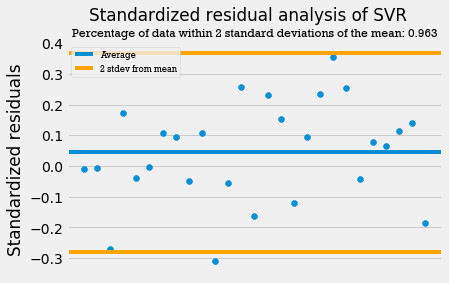

In [45]:
svrResid = y_rbf - ytest['TOV-NBA']

svrList = []
sumResid = 0

for i in svrResid.values:
    svrList.append(i)

for i in svrList:
    if i < 0:
        sumResid += (i * -1)
    elif i > 0:
        sumResid+= i
        
print(sumResid)
residSqrt = sumResid ** (1/2)
print(residSqrt)

svrResidArray = []
for i in svrList:
    svrResidArray.append(i / residSqrt)

svrResidList = []
for i in svrResidArray:
    svrResidList.append(i)    

svrResidTov, ax = plt.subplots()

x = np.arange(len(svrResidList))

ax.scatter(x, svrResidList)

ax.xaxis.set_visible(False)
ax.set_ylabel("Standardized residuals")

npList = np.array(svrResidList)
std = np.std(npList)
mean = np.mean(npList)

print(std, mean)

outliers = 0

for i in svrResidList:
    if i < mean - 2 * std:
        outliers += 1
    elif i > mean + 2 * std:
        outliers += 1
        
outlierPerc = outliers / 27
distPerc = 1 - outlierPerc

ax.axhline(y = mean, label = "Average")
ax.axhline(y = mean - 2 * std, color = 'orange')
ax.axhline(y = mean + 2 * std, label = "2 stdev from mean", color = 'orange')
ax.legend(loc='best', prop={'size': 9, "family": "Rockwell"})
ax.set_title("Percentage of data within 2 standard deviations of the mean: %.3f" % distPerc, fontname = 'Rockwell', size = 12)
svrResidTov.suptitle("Standardized residual analysis of SVR", y = 1.005)

svrResidTov.savefig('svr-resid-tov.png', dpi = 400, bbox_inches = 'tight')

15.949999999999998
3.9937451095431715
0.1834692064820596 -0.0055086139441975004


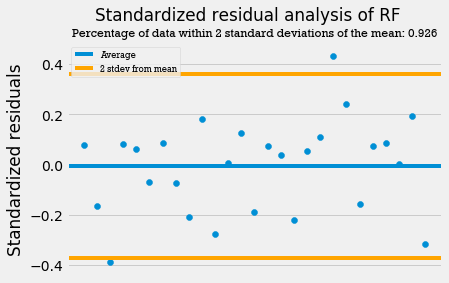

In [46]:
rfResid = y_rf - ytest['TOV-NBA']

rfList = []
sumResid = 0

for i in rfResid.values:
    rfList.append(i)

for i in rfList:
    if i < 0:
        sumResid += (i * -1)
    elif i > 0:
        sumResid+= i
        
print(sumResid)
residSqrt = sumResid ** (1/2)
print(residSqrt)

rfResidArray = []
for i in rfList:
    rfResidArray.append(i / residSqrt)

rfResidList = []
for i in rfResidArray:
    rfResidList.append(i)    
    
rfResidTov, ax = plt.subplots()

x = np.arange(len(rfResidList))

ax.scatter(x, rfResidList)

ax.xaxis.set_visible(False)
ax.set_ylabel("Standardized residuals")

npList = np.array(rfResidList)
std = np.std(npList)
mean = np.mean(npList)

print(std, mean)

outliers = 0

for i in rfResidList:
    if i < mean - 2 * std:
        outliers += 1
    elif i > mean + 2 * std:
        outliers += 1
        
outlierPerc = outliers / 27
distPerc = 1 - outlierPerc

ax.axhline(y = mean, label = "Average")
ax.axhline(y = mean - 2 * std, color = 'orange')
ax.axhline(y = mean + 2 * std, label = "2 stdev from mean", color = 'orange')
ax.legend(loc='best', prop={'size': 9, "family": "Rockwell"})
ax.set_title("Percentage of data within 2 standard deviations of the mean: %.3f" % distPerc, fontname = 'Rockwell', size = 12)
rfResidTov.suptitle("Standardized residual analysis of RF", y = 1.005)

rfResidTov.savefig('rf-resid-tov.png', dpi = 400, bbox_inches = 'tight')

[15.]
[3.87298335]
0.17619065202760134 -0.019317102121824647


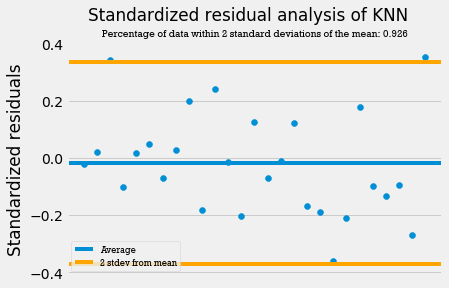

In [47]:
plt.style.use('fivethirtyeight')

knnResid = ytest.subtract(y_knn)

knnList = []
sumResid = 0

for i in knnResid.values:
    knnList.append(i)

for i in knnList:
    if i < 0:
        sumResid += (i * -1)
    elif i > 0:
        sumResid+= i
        
print(sumResid)
residSqrt = sumResid ** (1/2)
print(residSqrt)

knnResidArray = []
for i in knnList:
    knnResidArray.append(i / residSqrt)

knnResidList = []
for i in knnResidArray:
    knnResidList.append(i[0])    
    
knnResidTov, ax = plt.subplots()

x = np.arange(len(knnResidList))

ax.scatter(x, knnResidList)

ax.xaxis.set_visible(False)
ax.set_ylabel("Standardized residuals")

npList = np.array(knnResidList)
std = np.std(npList)
mean = np.mean(npList)

print(std, mean)

outliers = 0

for i in knnResidList:
    if i < mean - 2 * std:
        outliers += 1
    elif i > mean + 2 * std:
        outliers += 1
        
outlierPerc = outliers / 27
distPerc = 1 - outlierPerc

ax.axhline(y = mean, label = "Average")
ax.axhline(y = mean - 2 * std, color = 'orange')
ax.axhline(y = mean + 2 * std, label = "2 stdev from mean", color = 'orange')
ax.legend(loc='best', prop={'size': 9, "family": "Rockwell"})
ax.set_title("Percentage of data within 2 standard deviations of the mean: %.3f" % distPerc, fontname = 'Rockwell', size = 10)
knnResidTov.suptitle("Standardized residual analysis of KNN", y = 1.005)

knnResidTov.savefig('knn-resid-tov.png', dpi = 400, bbox_inches = 'tight')

# Durbin-Watson test for turnovers

In [48]:
print(stools.durbin_watson(linResidList))
print(stools.durbin_watson(svrResidList))
print(stools.durbin_watson(rfResidList))
print(stools.durbin_watson(knnResidList))

1.9898413414205938
1.8899148018427652
2.0305079082477304
2.057326542802352


# Jarque-Bera test for turnovers

In [49]:
print(stools.jarque_bera(linResidList))
print(stools.jarque_bera(svrResidList))
print(stools.jarque_bera(rfResidList))
print(stools.jarque_bera(knnResidList))

(0.284722610880073, 0.8673078368295773, 0.10116078551118167, 2.5393995797594466)
(0.6603082265174838, 0.7188129462896832, -0.329771725252868, 2.610201227954337)
(0.08491250821468663, 0.9584323920844255, -0.10959767678689131, 2.8343763843789604)
(0.8171151239481715, 0.6646082152295649, 0.3783411175408342, 2.607881969641273)


# Predictions for turnovers

In [50]:
linear_tov = linReg.predict(draftClassTest)

for i, j in zip(linear_tov, draftClassNames):
    print(i, j)

[2.3513543] Trae Young
[2.04337499] Collin Sexton
[1.79679051] SGA
[1.38388424] Jerome Robinson
[1.79281086] Troy Brown
[1.16647858] Donte DiVincenzo
[1.21903339] Lonnie Walker
[1.3781541] Kevin Huerter
[1.19280568] Josh Okogie
[0.77039169] Grayson Allen
[1.05904087] Chandler Hutchison
[1.18968419] Aaron Holiday
[0.9612814] Landry Shamet


In [51]:
svr_tov = svr_rbf.predict(draftClassTest)

for i, j in zip(svr_tov, draftClassNames):
    print(i, j)

2.666338498053669 Trae Young
2.2359116854729493 Collin Sexton
2.0800721198267453 SGA
1.5983889651862384 Jerome Robinson
1.8197687606346946 Troy Brown
1.5408751396225213 Donte DiVincenzo
1.3677078198136812 Lonnie Walker
1.5245937164433983 Kevin Huerter
1.3709588089613973 Josh Okogie
1.1884548165404496 Grayson Allen
1.1023758068912386 Chandler Hutchison
1.5758325462263585 Aaron Holiday
1.1002229329844724 Landry Shamet


In [52]:
rf_tov = rf.predict(draftClassTest)

for i, j in zip(rf_tov, draftClassNames):
    print(i, j)

2.244 Trae Young
1.5100000000000002 Collin Sexton
1.4240000000000002 SGA
1.2019999999999997 Jerome Robinson
1.3560000000000003 Troy Brown
1.0739999999999998 Donte DiVincenzo
1.0519999999999998 Lonnie Walker
1.0899999999999996 Kevin Huerter
1.1360000000000001 Josh Okogie
0.986 Grayson Allen
1.006 Chandler Hutchison
1.6340000000000003 Aaron Holiday
1.3179999999999996 Landry Shamet


In [53]:
knn_tov = knn.predict(draftClassTest)

for i, j in zip(knn_tov, draftClassNames):
    print(i, j)

[2.36] Trae Young
[2.42] Collin Sexton
[1.5] SGA
[1.17] Jerome Robinson
[1.42] Troy Brown
[1.31] Donte DiVincenzo
[1.19] Lonnie Walker
[1.21] Kevin Huerter
[1.05] Josh Okogie
[1.15] Grayson Allen
[1.15] Chandler Hutchison
[1.76] Aaron Holiday
[1.35] Landry Shamet


[['Trae Young', 2.3513542986037446], ['Collin Sexton', 2.043374989331505], ['SGA', 1.7967905115559288], ['Troy Brown', 1.7928108588988811], ['Jerome Robinson', 1.383884237043791], ['Kevin Huerter', 1.3781540982818035], ['Lonnie Walker', 1.2190333894936174], ['Josh Okogie', 1.1928056837379497], ['Aaron Holiday', 1.1896841936484321], ['Donte DiVincenzo', 1.166478583579643], ['Chandler Hutchison', 1.0590408720533988], ['Landry Shamet', 0.9612813965716782], ['Grayson Allen', 0.7703916856458104]]


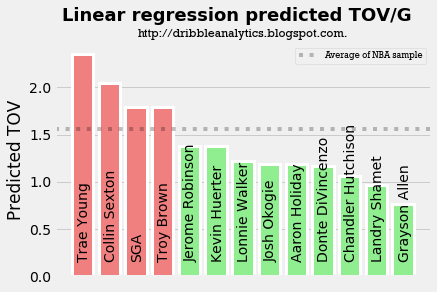

In [54]:
avgTov = 1.555639

plt.style.use('fivethirtyeight')
linRegTov, ax = plt.subplots()

linearPlot = []

for i in linear_tov:
    linearPlot.append(float(i))
    
combinedLinear = [[i, j] for i, j in zip(draftClassNames, linearPlot)]

sortedLinear = sorted(combinedLinear, key = itemgetter(1), reverse = True)
print(sortedLinear)

sortedLinearData = [row[1] for row in sortedLinear]
x_pos = np.arange(len(sortedLinearData))

colorList = []

for i in sortedLinearData:
    if i > avgTov:
        colorList.append('lightcoral')
    elif i < avgTov:
        colorList.append('lightgreen')

ax.bar(x_pos, sortedLinearData, color = colorList, edgecolor = 'white', linewidth = 3)

labels = [row[0] for row in sortedLinear]

rects = ax.patches
for rect, label in zip(rects, labels):
    height = .15
    ax.text(rect.get_x() + rect.get_width() / 1.75, height, label,
    ha='center', va='bottom', rotation = 'vertical', color = 'black')
    
linRegTov.suptitle("Linear regression predicted TOV/G", weight = 'bold', size = 18, y = 1.005)
ax.set_title("http://dribbleanalytics.blogspot.com.", size = 12, fontname = 'Rockwell')
ax.xaxis.set_visible(False)
ax.axhline(y = avgTov, color = 'black', label = "Average of NBA sample", linestyle = 'dotted', alpha = .25)
ax.set_ylabel("Predicted TOV")
ax.legend(loc='best', prop={'size': 9, "family": "Rockwell"})

linRegTov.savefig('lin-reg-tov.png', dpi = 400, bbox_inches = 'tight')

[['Trae Young', 2.666338498053669], ['Collin Sexton', 2.2359116854729493], ['SGA', 2.0800721198267453], ['Troy Brown', 1.8197687606346946], ['Jerome Robinson', 1.5983889651862384], ['Aaron Holiday', 1.5758325462263585], ['Donte DiVincenzo', 1.5408751396225213], ['Kevin Huerter', 1.5245937164433983], ['Josh Okogie', 1.3709588089613973], ['Lonnie Walker', 1.3677078198136812], ['Grayson Allen', 1.1884548165404496], ['Chandler Hutchison', 1.1023758068912386], ['Landry Shamet', 1.1002229329844724]]


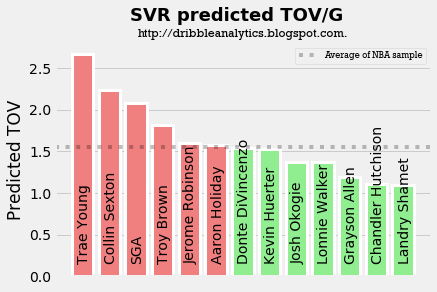

In [55]:
avgTov = 1.555639

plt.style.use('fivethirtyeight')
svrTov, ax = plt.subplots()

svrPlot = []

for i in svr_tov:
    svrPlot.append(float(i))
    
combinedSvr = [[i, j] for i, j in zip(draftClassNames, svrPlot)]

sortedSvr = sorted(combinedSvr, key = itemgetter(1), reverse = True)
print(sortedSvr)

sortedSvrData = [row[1] for row in sortedSvr]
x_pos = np.arange(len(sortedSvrData))

colorList = []

for i in sortedSvrData:
    if i > avgTov:
        colorList.append('lightcoral')
    elif i < avgTov:
        colorList.append('lightgreen')

ax.bar(x_pos, sortedSvrData, color = colorList, edgecolor = 'white', linewidth = 3)

labels = [row[0] for row in sortedSvr]

rects = ax.patches
for rect, label in zip(rects, labels):
    height = .15
    ax.text(rect.get_x() + rect.get_width() / 1.75, height, label,
    ha='center', va='bottom', rotation = 'vertical', color = 'black')

svrTov.suptitle("SVR predicted TOV/G", weight = 'bold', size = 18, y = 1.005)
ax.set_title("http://dribbleanalytics.blogspot.com.", size = 12, fontname = 'Rockwell')
ax.xaxis.set_visible(False)
ax.axhline(y = avgTov, color = 'black', label = "Average of NBA sample", linestyle = 'dotted', alpha = .25)
ax.set_ylabel("Predicted TOV")
ax.legend(loc='best', prop={'size': 9, "family": "Rockwell"})

svrTov.savefig('svr-tov.png', dpi = 400, bbox_inches = 'tight')

[['Trae Young', 2.244], ['Aaron Holiday', 1.6340000000000003], ['Collin Sexton', 1.5100000000000002], ['SGA', 1.4240000000000002], ['Troy Brown', 1.3560000000000003], ['Landry Shamet', 1.3179999999999996], ['Jerome Robinson', 1.2019999999999997], ['Josh Okogie', 1.1360000000000001], ['Kevin Huerter', 1.0899999999999996], ['Donte DiVincenzo', 1.0739999999999998], ['Lonnie Walker', 1.0519999999999998], ['Chandler Hutchison', 1.006], ['Grayson Allen', 0.986]]


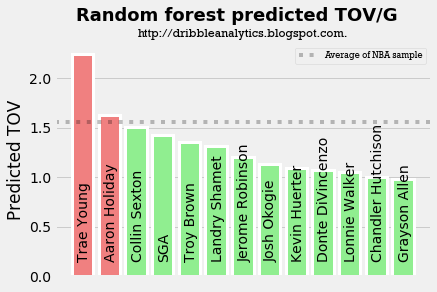

In [56]:
avgTov = 1.555639

plt.style.use('fivethirtyeight')
rfTov, ax = plt.subplots()

rfPlot = []

for i in rf_tov:
    rfPlot.append(float(i))
    
combinedRf = [[i, j] for i, j in zip(draftClassNames, rfPlot)]

sortedRf = sorted(combinedRf, key = itemgetter(1), reverse = True)
print(sortedRf)

sortedRfData = [row[1] for row in sortedRf]
x_pos = np.arange(len(sortedRfData))

colorList = []

for i in sortedRfData:
    if i > avgTov:
        colorList.append('lightcoral')
    elif i < avgTov:
        colorList.append('lightgreen')

ax.bar(x_pos, sortedRfData, color = colorList, edgecolor = 'white', linewidth = 3)

labels = [row[0] for row in sortedRf]

rects = ax.patches
for rect, label in zip(rects, labels):
    height = .15 
    ax.text(rect.get_x() + rect.get_width() / 1.75, height, label,
    ha='center', va='bottom', rotation = 'vertical', color = 'black')

rfTov.suptitle("Random forest predicted TOV/G", weight = 'bold', size = 18, y = 1.005)
ax.set_title("http://dribbleanalytics.blogspot.com.", size = 12, fontname = 'Rockwell')
ax.xaxis.set_visible(False)
ax.axhline(y = avgTov, color = 'black', label = "Average of NBA sample", linestyle = 'dotted', alpha = .25)
ax.set_ylabel("Predicted TOV")
ax.legend(loc='best', prop={'size': 9, "family": "Rockwell"})

rfTov.savefig('rf-tov.png', dpi = 400, bbox_inches = 'tight')

[['Collin Sexton', 2.42], ['Trae Young', 2.36], ['Aaron Holiday', 1.7599999999999998], ['SGA', 1.5000000000000002], ['Troy Brown', 1.4200000000000002], ['Landry Shamet', 1.35], ['Donte DiVincenzo', 1.31], ['Kevin Huerter', 1.21], ['Lonnie Walker', 1.19], ['Jerome Robinson', 1.17], ['Grayson Allen', 1.15], ['Chandler Hutchison', 1.15], ['Josh Okogie', 1.0499999999999998]]


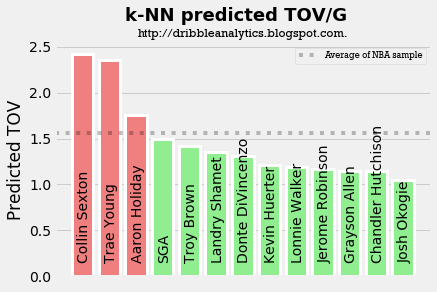

In [57]:
avgTov = 1.555639

plt.style.use('fivethirtyeight')
knnTov, ax = plt.subplots()

knnPlot = []

for i in knn_tov:
    knnPlot.append(float(i))
    
combinedKnn = [[i, j] for i, j in zip(draftClassNames, knnPlot)]

sortedKnn = sorted(combinedKnn, key = itemgetter(1), reverse = True)
print(sortedKnn)

sortedKnnData = [row[1] for row in sortedKnn]
x_pos = np.arange(len(sortedKnnData))

colorList = []

for i in sortedKnnData:
    if i > avgTov:
        colorList.append('lightcoral')
    elif i < avgTov:
        colorList.append('lightgreen')

ax.bar(x_pos, sortedKnnData, color = colorList, edgecolor = 'white', linewidth = 3)

labels = [row[0] for row in sortedKnn]

rects = ax.patches
for rect, label in zip(rects, labels):
    height = .15
    ax.text(rect.get_x() + rect.get_width() / 1.75, height, label,
    ha='center', va='bottom', rotation = 'vertical', color = 'black')

knnTov.suptitle("k-NN predicted TOV/G", weight = 'bold', size = 18, y = 1.005)
ax.set_title("http://dribbleanalytics.blogspot.com.", size = 12, fontname = 'Rockwell')
ax.xaxis.set_visible(False)
ax.axhline(y = avgTov, color = 'black', label = "Average of NBA sample", linestyle = 'dotted', alpha = .25)
ax.set_ylabel("Predicted TOV")
ax.legend(loc='best', prop={'size': 9, "family": "Rockwell"})

knnTov.savefig('knn-tov.png', dpi = 400, bbox_inches = 'tight')

[['Trae Young', 2.4054231991643533], ['Collin Sexton', 2.0523216687011137], ['SGA', 1.7002156578456686], ['Troy Brown', 1.5971449048833941], ['Aaron Holiday', 1.5398791849686977], ['Jerome Robinson', 1.3385683005575073], ['Kevin Huerter', 1.3006869536813004], ['Donte DiVincenzo', 1.2728384308005412], ['Lonnie Walker', 1.2071853023268244], ['Josh Okogie', 1.1874411231748367], ['Landry Shamet', 1.1823760823890375], ['Chandler Hutchison', 1.0793541697361593], ['Grayson Allen', 1.0237116255465648]]


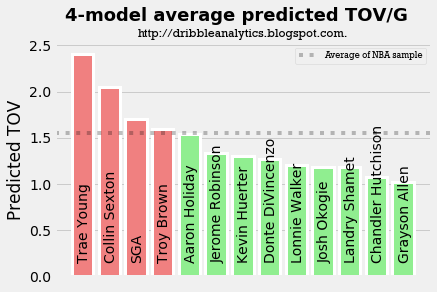

In [58]:
avgTov = 1.555639

avgTovGraph, ax = plt.subplots()

averagePred = []

for i, j, h, k in zip(linear_tov, svr_tov, rf_tov, knn_tov):
    averagePred.append(float((i + j + h + k) / 4))

combinedAvg = [[i, j] for i, j in zip(draftClassNames, averagePred)]

sortedAvg = sorted(combinedAvg, key = itemgetter(1), reverse = True)
print(sortedAvg)

sortedAvgData = [row[1] for row in sortedAvg]
x_pos = np.arange(len(sortedAvgData))

colorList = []

for i in sortedAvgData:
    if i > avgTov:
        colorList.append('lightcoral')
    elif i < avgTov:
        colorList.append('lightgreen')

ax.bar(x_pos, sortedAvgData, color = colorList, edgecolor = 'white', linewidth = 3)

labels = [row[0] for row in sortedAvg]

rects = ax.patches
for rect, label in zip(rects, labels):
    height = .15
    ax.text(rect.get_x() + rect.get_width() / 1.75, height, label,
    ha='center', va='bottom', rotation = 'vertical', color = 'black')

avgTovGraph.suptitle("4-model average predicted TOV/G", weight = 'bold', size = 18, y = 1.005)
ax.set_title("http://dribbleanalytics.blogspot.com.", size = 12, fontname = 'Rockwell')
ax.xaxis.set_visible(False)
ax.axhline(y = avgTov, color = 'black', label = "Average of NBA sample", linestyle = 'dotted', alpha = .25)
ax.set_ylabel("Predicted TOV")
ax.legend(loc='best', prop={'size': 9, "family": "Rockwell"})

avgTovGraph.savefig('avg-tov.png', dpi = 400, bbox_inches = 'tight')

# Predicted assists / predicted turnovers

[['Trae Young', 2.4348262942289316], ['Aaron Holiday', 2.226216356879596], ['Collin Sexton', 2.0882431707103577], ['Landry Shamet', 2.0311695455650054], ['Grayson Allen', 1.9696423166104322], ['SGA', 1.9678316626007175], ['Kevin Huerter', 1.7441807472077269], ['Jerome Robinson', 1.6887096546149512], ['Troy Brown', 1.6870581755073926], ['Donte DiVincenzo', 1.5539282141265802], ['Chandler Hutchison', 1.5238603519350644], ['Lonnie Walker', 1.4694067417870686], ['Josh Okogie', 1.3766577419846346]]


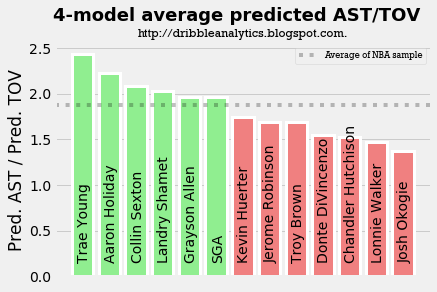

In [59]:
avgAstTov = 1.872334

avgAstTovGraph, ax = plt.subplots()

avgAst =[]

for i, j, h, k in zip(linear_ast, svr_ast, rf_ast, knn_ast):
    avgAst.append(float((i + j + h + k) / 4))
    
avgTov = []

for i, j, h, k in zip(linear_tov, svr_tov, rf_tov, knn_tov):
    avgTov.append(float((i + j + h + k) / 4))

    
avgAstTovDC = []

for i, j in zip(avgAst, avgTov):
    avgAstTovDC.append(i / j)
    
combinedAvg = [[i, j] for i, j in zip(draftClassNames, avgAstTovDC)]

sortedAvg = sorted(combinedAvg, key = itemgetter(1), reverse = True)
print(sortedAvg)

sortedAvgData = [row[1] for row in sortedAvg]
x_pos = np.arange(len(sortedAvgData))

colorList = []

for i in sortedAvgData:
    if i < avgAstTov:
        colorList.append('lightcoral')
    elif i > avgAstTov:
        colorList.append('lightgreen')

ax.bar(x_pos, sortedAvgData, color = colorList, edgecolor = 'white', linewidth = 3)

labels = [row[0] for row in sortedAvg]

rects = ax.patches
for rect, label in zip(rects, labels):
    height = .15
    ax.text(rect.get_x() + rect.get_width() / 1.75, height, label,
    ha='center', va='bottom', rotation = 'vertical', color = 'black')

avgAstTovGraph.suptitle("4-model average predicted AST/TOV", weight = 'bold', size = 18, y = 1.005)
ax.set_title("http://dribbleanalytics.blogspot.com.", size = 12, fontname = 'Rockwell')
ax.xaxis.set_visible(False)
ax.axhline(y = avgAstTov, color = 'black', label = "Average of NBA sample", linestyle = 'dotted', alpha = .25)
ax.set_ylabel("Pred. AST / Pred. TOV")
ax.legend(loc='best', prop={'size': 9, "family": "Rockwell"})

avgAstTovGraph.savefig('avg-ast-tov.png', dpi = 400, bbox_inches = 'tight')